In [133]:
# https://medium.com/@QwQiao/statistical-fallacy-behind-the-lindy-effect-b115048dbbab

import random
import numpy as np
import matplotlib.pyplot as plt

In [204]:
# Use exponential distribution
sample = 100000
total_life = np.random.exponential(scale = 0.1, size=sample)
total_life = total_life[(total_life>0)&(total_life<0.85)]
# verified that this is how lifespan curve looks like
# Adjusting the scale to 0.1 and limiting values to 1.0 max makes the curve work

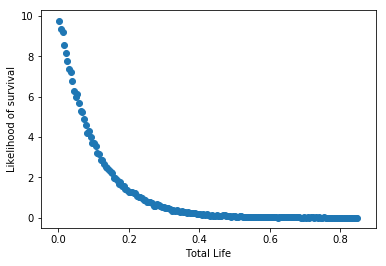

In [205]:
# Plot the output, higher sample size = more data points
hist,edges = np.histogram(total_life,bins="auto",density=True )
x = edges[:-1]+np.diff(edges)/2.
plt.scatter(x,hist)
plt.xlabel('Total Life')
plt.ylabel('Likelihood of survival')
plt.show()

In [206]:
# Verify equivalence of Exponential to Normal distribution
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')
no = qt.fit_transform(total_life.reshape(-1, 1))

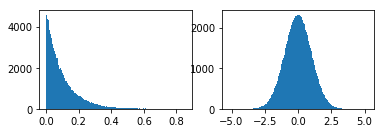

In [207]:
# Plot histograms of Exponential and Normal distributions
import matplotlib.pyplot as plt
%matplotlib inline 
plt.subplot(2, 2, 1)
plt.hist(total_life, bins='auto')
plt.subplot(2, 2, 2)
plt.hist(no, bins='auto')
plt.show()

In [208]:
# For each data point, initial current age
# Current age follows uniform distribution between 0 and total lifespan
# Also initial future life expectancy
age = []
future_life_expectancy = []

for l in total_life:
    random_age = np.random.uniform( 0, max(total_life))
    age.append(random_age)
    
    random_future_life_expectancy = (l - random_age)
    future_life_expectancy.append(random_future_life_expectancy)

In [209]:
Y = future_life_expectancy
X = age

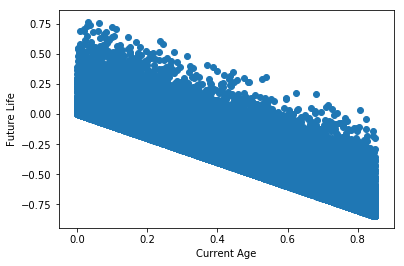

In [210]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel('Current Age')
plt.ylabel('Future Life')
plt.scatter(X, Y)
plt.show()

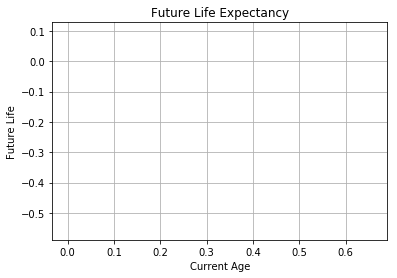

In [181]:
yfit = [a + b * xi for xi in X]
plt.xlabel('Current Age')
plt.ylabel('Future Life')
plt.title('Future Life Expectancy')
plt.plot(X, yfit)
plt.grid()
plt.show()

In [122]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum(xi*yi for xi,yi in zip(X, Y)) - n * xbar * ybar
    denum = sum(xi**2 for xi in X) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

best fit line:
y = 0.10 + -0.99x


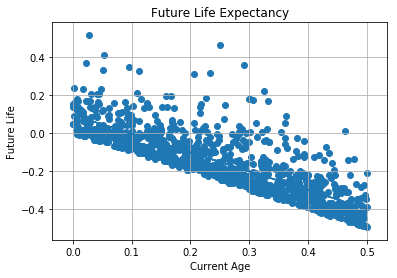

In [123]:
# solution
a, b = best_fit(X, Y)

# plot points and fit line
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X, Y)
yfit = [a + b * xi for xi in X]
plt.xlabel('Current Age')
plt.ylabel('Future Life')
plt.title('Future Life Expectancy')
plt.plot(X, yfit)
plt.grid()
plt.show()

In [108]:
from scipy.odr import Model, Data, ODR
from scipy.stats import linregress

def f(p, x):
    return (p[0] * x) + p[1]

linreg = linregress(X, Y)
mod = Model(f)
dat = Data(X, Y)
od = ODR(dat, mod, beta0=[1., 2.])
out = od.run()
TLSbeta = out.beta[0]

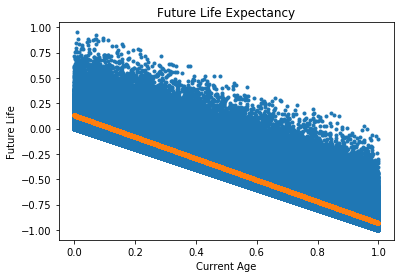

In [109]:
# Plot chart

plt.plot(X, Y, '.')
plt.plot(X, out.beta[1] + np.multiply(X, out.beta[0]), '.')

plt.xlabel('Current Age')
plt.ylabel('Future Life')
plt.title('Future Life Expectancy')
plt.show()
#plt.savefig('Lindy not true')
#plt.clf()